<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br>Assignment 2 [GROUP PROJECT]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment2_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : hs3458, kem2231
#### **Your Full names** : Harini Sundararajan, Kate McGrath
#### **Your AI Model Share Usernames**: harinisund,
#### **Link to your Public Github repository** : Fill here (single link is expected)
#### **Team member Contribution Percentages** : Fill here

---
<br>

This notebook contains starter code (and instructions) for our 2nd assignment where we'll work with COVID data. For this assignment you are expected to work in groups. Each group has to make a single assihnment submission.<br><br>
You shall be graded on your learning and initiative outside classroom,  understanding and correctness.
<br><br>
<b>Treat this as a major project where you go looking for the best methods to prepare data, experiment with and train different models, and evaluate results as holistically as possible.</b>
<br><br>
Short but to-the-point answers to conceptual questions are acceptable as long as they convey your ideas effectively.<br><br>
Reference codes have been given for an understanding of what is to be done. Refrain from using the same for your submissions.<br><br>
Marks may be deducted for failure to adhere to any instructions provided in the cell blocks below.<br><br><br>


Instructions for this assignment:

1. Your final report should be written up in a Jupyter notebook. It should be posted to a **public** Github repo as an ipynb. This notebook ipynb would be submitted as an assignment via courseworks. Please include the link to your Github repo in this ipynb file.
<br><br>
2. **Your report should include the following information:**
    * Citation of paper providing original dataset:  M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, [Link](https://arxiv.org/abs/2003.13145)<br><br>
3. **Overall Outline of this notebook**
    * Visualize images that demonstrate when x-rays demonstrate Covid Positivity. You can do other basic data visualization steps here. <span style="color:yellow;"> (5 pts)</span> <br><br>
    * Analyze the dataset and explain the outcomes. Perform Image Augmentation on the dataset <span style="color:yellow;"> (10 pts)</span><br><br>
    * Run at least 4 prediction models to try to predict x-ray images well.<span style="color:yellow;"> (45 pts)</span>
        * Use at the minimum 2 from-scratch CNN models and minimum 2 transfer learning models
        * Answer questions and Discuss which models performed better and point out relevant hyper-parameter values for successful models.
        * Submit your best three models to the leader board for the Covid X-ray Diagnostic AI Model Share competition.<br><br>
    * After you submit your first 4 models, experiment with finding the best model with your team<span style="color:yellow;"> (10 pts)</span>
        * Fit and submit atleast one more and up to three more models after discussion with your team. This part is to encourage you to try different architectures and get competitive or better accuracies.
        *  Discuss results<br><br>
    * Discuss exhaustively which models you tried finally and compare properly which models performed better. <span style="color:yellow;"> (15 pts)</span><br><br>
4. Make the Python Code repo, Front end notebook, Final report and README file. Mention the citations, and your model evaluations and discussion in your `README`, and ensure your `README` looks professional. Examples are in the section. <span style="color:yellow;"> (15 pts)</span>


---

# **STEP 0: Install the `ai modelshare` package**

In [ ]:
# Begin to submit models to image classification leaderboard
! pip install aimodelshare --upgrade
# Restart session Runtime > Restart runtime

# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to your drive. The code assume you will upload it to your base folder in drive... however you can change the directory (just make sure to update the path accordingly)**

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

Mounted at /content/drive


In [ ]:
## You can upload this data to your won drive and change the above path so you don't have to upload and unzip data everytime. Change folder base path below accordingly.

In [ ]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


# **STEP 2: Prepare the dataset**

In [ ]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']


# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)


print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2311.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-158.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3438.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1361.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-321.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-242.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-192.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2041.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2266.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-912.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1918.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2350.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2265.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3467.png', 'COVID-19_Radiography_Dataset/COVID/images/COVI

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0] = fnames[0][0:1344]
fnames[1] = fnames[1][0:1344]
fnames[2] = fnames[2][0:1344]

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image



def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data


# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]


# Iteratively import and preprocess data using map function


# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor, image_filepaths))


# Object needs to be an array rather than a list for Keras (map returns to list object)
X = np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
print(len(X) )          # same number of elements as filenames

print(X.shape )         # dimensions now 192,192,3 for all images

print(X.min().round() ) # min value of every image is zero

print(X.max() )         # max value of every image is one

4032
(4032, 192, 192, 3)
-0.0
1.0


In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat


# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))


#combine into single list of y labels
y_labels = covid + normal + pneumonia


#check length, same as X above
print(len(y_labels))


# Need to one hot encode for Keras.  Let's use Pandas
import pandas as pd
y = pd.get_dummies(y_labels)


display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4027,0,0,1
4028,0,0,1
4029,0,0,1
4030,0,0,1


# **STEP 3: Visualizations <span style="color:yellow;">(5pts)</span>**

**Use the `fnames` variable to extract images from all possible combinations of input data and plot them below. Make sure to label each plot appropriately**

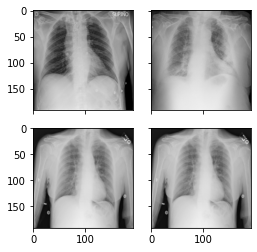

In [ ]:
# your code here

# **STEP 4: Analyzing and Augmenting Dataset <span style="color:yellow;">(10pts)</span>**


What are the data analysis steps you performed? What did you notice? What are you conclusions?

In [ ]:
## Your answer here

In [ ]:
# Implement Data Augmentation steps (here or above during preprocessing)

What specific preprocessing and augmentation strategies did you apply to your dataset, and why? How would these strategies improve your model's training and generalization?

# **STEP 5: Splitting Dataset**

**No coding to be done here**

In [ ]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [ ]:
#Clear objects from memory

del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle


# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)


# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)


# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

# **STEP 6: Model Training and parameter tuning <span style="color:yellow;"> (45pts)</span>**

**Define your model architecture, define the model parameters, define the training parameters, define the training values. <br><br>
Use the code provided below as a reference.<br><br>
Test out as many models here as you want, but submit (to aimodelshare) only your final models. Excessive submissions will be penalized.<br><br>**


#### REFERENCE CODE TO DEFINE MODELS


``` python
import tensorflow as tf
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 5 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, epochs = 1, verbose=1,validation_split=.2) #, callbacks=[red_lr]) for callback that automatically adjusts lr
```

<br><br>
#### REFERENCE CODE TO SAVE MODELS

```python
model.save("model1.h5", save_format="h5")
```

<br><br>
#### REFERENCE CODE TO RELOAD MODELS INCASE YOU LOSE PROGRESS

```python
# Reload model and data
import tensorflow as tf
model = tf.keras.models.load_model('model1.h5',compile=False)
model.compile(
    optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.summary()
```

<br><br>
#### REFERENCE CODE TO SAVE MODEL IN ONNX FORMAT

```python
# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx


onnx_model = model_to_onnx(
                            model,
                            framework='keras',
                            transfer_learning=False,
                            deep_learning=True
                          )


with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
```


<br><br>
#### REFERENCE CODE TO SUBMIT PREDICTIONS

```python
#Use X_test data to generate model predictions and make leaderboard submission

#Generate and save predictions

#Load preprocessed data
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  

# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)
    

prediction_column_index=model.predict(X_test).argmax(axis=1)


# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]


# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model_filepath = "model.onnx",
                        preprocessor_filepath="preprocessor.zip",
                        prediction_submission=prediction_labels
                        )
```

<br><br>
#### REFERENCE CODE TO CHECK LEADERBOARD

```python
data = experiment.get_leaderboard()
experiment.stylize_leaderboard(data)
```

In [ ]:
# Save preprocessor function (may need to reload function in cell above)
import aimodelshare as ai
from aimodelshare.aws import set_credentials

ai.export_preprocessor(preprocessor,"")

apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

experiment= ai.Experiment(apiurl)

set_credentials(apiurl=apiurl)

# NOTE :

**In the following sections, keep proper track of your experimentations, models (name them properly), their histories (both as csv's and exported images of loss curves), evaluations and results (export csv's and keep track), and their saved model exports (.h files).**

You will need to upload the final saved models and download them later as weights to build an inference engine. Your results should be reproducible, so use random seeds at appropriate places.

# **STEP 6(a): Custom CNN based models**

You will build a minimum of 2 CNN models. The depth of all models should be a minimum of 12 Convolutional layers (not counting BatchNorms, Pools and Activations). Print model summaries with Input shape defined.

In [ ]:
# your code here

1. What motivated your specific architectural design choices when implementing your custom CNNs? Discuss the reasoning behind the number of layers, types of layers (convolutional, pooling, fully connected, etc.), and their configurations.
2. Which regularization techniques and callbacks did you implement to prevent overfitting? Explain how you chose where to apply these techniques and their effectiveness.
3. Describe your approach to hyperparameter tuning. How did you select the values for learning rate, batch size, and number of epochs? Discuss any strategies you used to find the optimal hyperparameters.
4. Which loss function and optimizer did you choose for training your CNN, and why? How do these choices impact the convergence and accuracy of your model?
5. Reflect on a significant challenge you encountered during the implementation of your CNN. How did you overcome this challenge, and what did you learn from it?

In [ ]:
# Your answers and discussion here

# **STEP 6(b): Transfer Learning models**

You will use a minimum of 2 Pre-trained models and Fine-tune them on our dataset. Take careful choices about which models you get from the internet. Cite their usage properly within this notebook, and in the Github repo (instructions in last section).


In [ ]:
# your code here

1. Which Models did you try for Transfer Learning? What was the pre-trained model originally trained on?
2. Which models converged faster upon fine-tuning? Why do you think that happened?
3. How did you do fine-tuning on this dataset? (What layers did you add / freeze / unfreeze), How many parameters were there in total in the pretrained model you finetuned? How many trainable and untrainable?
4. How does the performance of your Transfer Learning model compare with a model trained from scratch on the same task? Discuss the advantages and potential limitations of using Transfer Learning in this context.
5. Throughout the coding process, what was the most difficult decision you had to make, and how did you arrive at your final choice?




In [ ]:
# your Answers and discussion here

# **STEP 7: Additional Models of your choice <span style="color:yellow;"> (10pts)</span>**

---


Please ensure that you are only using Keras / Tensorflow.

In [ ]:
# your code here

Is there a particular part of your code that you're especially proud of optimizing or simplifying? How did you achieve it?

In [ ]:
# your answer here

Did you try any approaches and models taught outside class? What recently released papers / architectures do you wish you could implement given more time?

# **STEP 8: Analysis of your models (15 pts)**

### **<span style="color:red;">Your Answer here:</span>**

Tabularize your results from different models, compare convergence rates, performance metrics and whichever aspects you deem suitable for comparison. Analyze and Discuss results exhaustively.

### **<span style="color:red;">Your Discussion here:</span>**

# **STEP 9: Conclusions**



### **<span style="color:red;">Your Answer here:</span>**




# **STEP 10: Github Repo <span style="color:yellow;"> (15pts)</span>**

<b>Github Repo: </b>

You will exercise **Modularization** and Good Github organization: You should take the relevant code and make it into classes across different python (.py) files so that you can just import those files and/or classes and/or functions and/or modules, instantiate the model using them, load weights from your saved models, and start predicting on any new set of test images (not just the test set from this dataset).

Essentially, you should have a simple and clean **"front-end" notebook** where you download your trained and saved model(s) from say a personal drive link, and have an inference pipeline ready within a few lines of code to predict on any new unseen x-ray images.



<br><br>

In the **README.md** file of your repository should be an overall outline of your experiments, including the models you trained succesfully and have results for - summarized in a tabular way. You can include other details as well.

Look at different readme's across github to see how they are organized. Refer to [this resource](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to learn how to format the file.

- Example of a [Good Readme File](https://github.com/priyavrat-misra/xrays-and-gradcam#readme) (We have no affiliations with Author)
- Example of a [Bad Readme File](https://github.com/anubhavparas/image-classification-using-cnn)
(No offence is intended to Author)

<br><br>
In the **Final report** (.ipynb) notebook, put whatever code, visuals and results you think is relevant adhering to the modularization that you did. It is open ended, you should not just post a copy of this notebook for it.

<br><br>

Remember that this is your showcase to the public.
Cite the dataset as said before. Cite the open source models and any other models or weights you used for Transfer learning.


#### Do not forget to link the final Github repository containing the Front-end running notebook, your code, Readme and Final report at the top of this notebook.